## Árvores de Decisão

Uma árvore de decisão usa a estratégia dividir para conquistar para resolver um problema de decisão. Um problema complexo é dividigo em problemas mais simples, aos quais recursivamente é aplicada a mesma estratégia. As soluções dos subproblemas podem ser combinadas, na forma de uma árvore, para produzir uma solução do problema complexo. A força dessa proposta vem da capacidade de dividir o espaço de instâncias em subespaçõs e cada subespaço é ajustado usando diferentes modelos. Essa é a ideia básica por trás de algoritmos baseados em árvores de decisão, tais como: ID3 (Quinlan, 1979), ASSISTANT (Cestnik et al., 1996), CART (Breiman et al., 1984), C4.5 (Quinlan 1993). 

Os modelos em árvore são designados <i>árvores de decisão</i> no caso de problemas de classificação e <i>árvores de regressão</i> nos problemas de regressão.

Formalmente, uma árvore de decisão é um grafo aciclico derecionado em que cada nó <i>é um nó de divisão</i>, com dois ou mais sucessores, ou um <i>nó folha</i>.

- Um nó folha é rotulado com uma função. Usualmente são considerados apenas os valores da variavel alvo nos exemplos que chegam a um nó folha. No caso mais simples, a função é a constante que minimiza a função de custo.


- Um nó de divisão contém um teste condicional baseado nos valores do atributo. Na proposta padrão, os testes são univariados: as condições envolvem um único atributo e valires no domínio desse atributo.


![](./images/arvore_de_decisao_no_folha.png)

#### Videos

- [Entropia e Aprendizagem de Árvores de Decisão - C4.5](https://www.youtube.com/watch?v=qPbimX0R5vg)

### Árvore de classificação padrão

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#!pip install pydot
#!pip install graphviz

import pydot
import graphviz

In [15]:
instances = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True,  'Especie': 'Cachorro'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True,  'Especie': 'Gato'},
    {'Melhor Amigo': True,  'Especie': 'Cachorro'}
]

In [16]:
df = pd.DataFrame(instances)
df

,Especie,Melhor Amigo
0,Cachorro,False
1,Cachorro,True
2,Gato,True
3,Gato,True
4,Gato,False
5,Gato,True
6,Gato,True
7,Cachorro,False
8,Gato,True
9,Cachorro,False


In [17]:
X_train = [[1] if x else [0] for x in df['Melhor Amigo']]
Y_train = [1 if y == 'Cachorro' else 0 for y in df['Especie']]
labels = ['Melhor Amigo']

In [18]:
print(X_train)
print(Y_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [19]:
clf = DecisionTreeClassifier(max_depth= None,
                             max_features = None,
                             criterion = 'entropy',
                             min_samples_leaf = 1,
                             min_samples_split = 2)

In [20]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
output = '/home/avinicius/workspace/machine-learning/tree.dot'

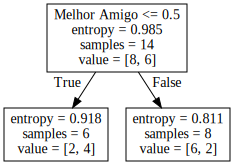

In [22]:
export_graphviz(clf, out_file= output, feature_names= labels)

with open(output) as file:
    dot_graph = file.read()
    
graphviz.Source(dot_graph)

In [ ]:
#!dot -Tpng tree.dot -o tree.png

#### Iris dataset

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [70]:
dataset_iris = load_iris()

df = pd.DataFrame(data=dataset_iris.data, columns=dataset_iris.feature_names)

In [71]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_iris.data, 
                                                    dataset_iris.target, 
                                                    test_size = 0.33)

In [82]:
clf = DecisionTreeClassifier(max_depth= None,
                             max_features = None,
                             criterion = 'entropy',
                             min_samples_leaf = 1,
                             min_samples_split = 2)

model = clf.fit(X_train, Y_train)
predicts = model.predict(X_test)

In [83]:
print(confusion_matrix(Y_test, predicts))

[[20  0  0]
 [ 0 14  0]
 [ 0  3 13]]


In [84]:
print('Acuracia com dados de teste: ', accuracy_score(Y_test, predicts))

Acuracia com dados de teste:  0.94


In [85]:
output = '/home/avinicius/workspace/machine-learning/tree.dot'

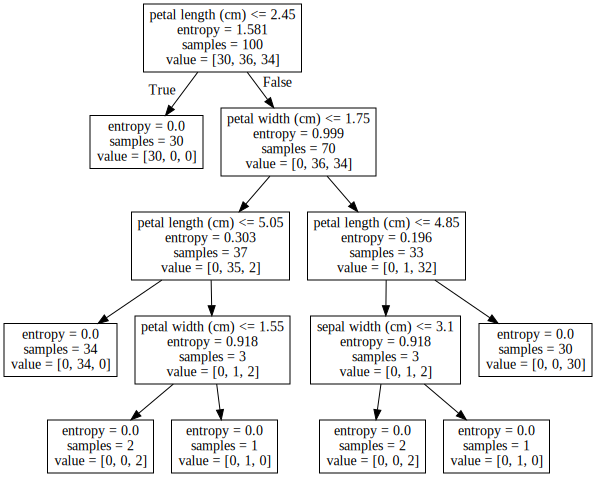

In [86]:
export_graphviz(clf, out_file=output, feature_names=dataset_iris.feature_names)

with open(output) as file:
    dot_graph = file.read()
    
graphviz.Source(dot_graph)